In [1]:
#imported important libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
#reading the dataset
df = pd.read_csv('CibioD.csv')

In [4]:
df.head()

,Chest Pain,Fatigue,fast heart rate,dizziness,shortness of breathing,murmur,irregular heart beating,cool skin,Weakness,sweating,...,infection.1,warts,cough,dark urine,warmness,pale stool,eye discharge,skin erosion,fused eyelids,prognosis
0,1,1,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Coronary Artery Disease
1,1,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,Endocarditis (Rheumatic heart disease)
2,1,0,1,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,Cardiac Arrest
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Mayocardities
4,1,0,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Arrhythmias


In [5]:

df.shape

(284, 240)

In [6]:
#seeing any null values are there with descending format
df.isnull().sum().sort_values(ascending=False)

prognosis                                     0
fused eyelids                                 0
inflammation                                  0
heart problems                                0
deformity                                     0
painful movement                              0
redness                                       0
fatigue.1                                     0
itching                                       0
impaired muscle function                      0
overgrowth of certain muscles                 0
abnormality of calf                           0
respiratory problems                          0
difficulty in walking or running              0
numbness or tringling                         0
joint pain                                    0
fever.2                                       0
chest pain                                    0
pain in the affected area                     0
atrophy                                       0
bruising                                

In [7]:
df.columns

Index(['Chest Pain', 'Fatigue', 'fast heart rate', 'dizziness',
       'shortness of breathing', 'murmur', 'irregular heart beating',
       'cool skin', 'Weakness', 'sweating',
       ...
       'infection.1', 'warts', 'cough', 'dark urine', 'warmness', 'pale stool',
       'eye discharge', 'skin erosion', 'fused eyelids', 'prognosis'],
      dtype='object', length=240)

In [8]:
#looking how much percent each diseases having
df['prognosis'].value_counts(normalize = True)

Osteofibrous dysplasia                                     0.003521
Molluscum contagiosum                                      0.003521
Arthritis                                                  0.003521
Eisenmenger syndrome                                       0.003521
Hepatitis                                                  0.003521
Paroymsal Positional Vertigo                               0.003521
Tietze syndrome                                            0.003521
Melanoma                                                   0.003521
COPD                                                       0.003521
Hyperlipidemia                                             0.003521
Split hand foot malformation                               0.003521
Enlarged Heart                                             0.003521
Valvular heart disease                                     0.003521
Desbuquois syndrome                                        0.003521
Hurler syndrome                                 

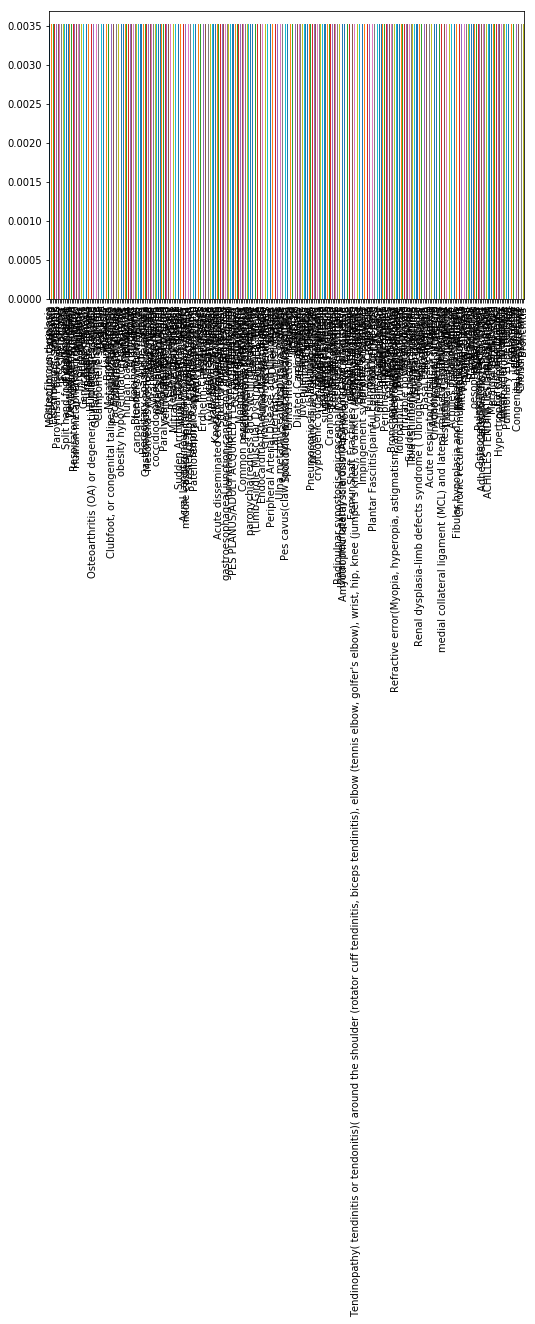

In [9]:
#as we can see each no. diseases having the same percentage through bar chart
df['prognosis'].value_counts(normalize = True).plot.bar(xlim=10)
plt.subplots_adjust(left = 0.9, right = 2 , top = 2, bottom = 1)

In [10]:
#seperated the independent and dependent values to repective variables 
x = df.drop(['prognosis'],axis =1)
y = df['prognosis']

In [11]:
#took two high correlation variables and analysing if it is satisfying null hypothesis or alternate hypothesis
#pd.crosstab(df['Cardiac Arrest'],df['Hypertension'])

In [12]:
#imported the chi square contingency
#from scipy.stats import chi2_contingency

In [13]:
#as p value is  0.0  which is less than 0.05 then they are actually different from each other which satisfy the alternate hypothesis 
#chi2_contingency(pd.crosstab(df['cold_hands_and_feets'],df['weight_gain']))

In [14]:
#seperated the independent and dependent values to repective variables 
# x = df.drop(['prognosis'],axis =1)
# y = df['prognosis']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
#divided into testing and training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [17]:
#imported naive_baye algorithm
from sklearn.naive_bayes import MultinomialNB

In [18]:
#fitted the model
mnb = MultinomialNB()
mnb = mnb.fit(x_train, y_train)

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
y_pred = mnb.predict(x_test)

In [21]:
accuracy_score(y_pred,y_test)

0.0

In [22]:
#by cross validating we got mean also 100%
#from sklearn.model_selection import cross_val_score
#scores = cross_val_score(mnb, x_test, y_test, cv=3)
#scores = cross_val_score(mnb, x_test, y_test)
#print (scores)
#print (scores.mean())

In [23]:
real_diseases = y_test.values

In [24]:
#for the cross checking purpose i want to see if predicted values and actual values are same else it gives me worng prediction 
for i in range(0, len(real_diseases)):
    if y_pred[i] == real_diseases[i]:
        print ('Pred: {0} Actual:{1}'.format(y_pred[i], real_diseases[i]))
    else:
        print('worng prediction')
        print ('Pred: {0} Actual:{1}'.format(y_pred[i], real_diseases[i]))

worng prediction
Pred: Sudden Arrhythmia Death syndrome Actual:Stroke
worng prediction
Pred: (Limb-Girdle Muscular Dystrophies) LGMD 2A Actual:Psoriasis
worng prediction
Pred: Metatropic dysplasia Actual:Cranioectodermal dysplasia
worng prediction
Pred: Crohn's disease Actual:E.coli infection
worng prediction
Pred: Pneumoconiosis (black lung disease) Actual:Pleural Effusion.
worng prediction
Pred: Tinnitus Actual:pituitary gland tumor
worng prediction
Pred: Erythromelalgia Actual:Ichthyosis
worng prediction
Pred: Chronic recurrent multifocal osteomyelitis Actual:Pachydermoperiostosis
worng prediction
Pred: (Limb-Girdle Muscular Dystrophies) LGMD 2A Actual:Hurler syndrome
worng prediction
Pred: Cervical spondylosis Actual:Whiplash
worng prediction
Pred: Hyperlipidemia Actual:Kawasaki disease
worng prediction
Pred: Keratosis Follicularis Actual:AEC syndrome
worng prediction
Pred: Posterior Tibial Tendon Dysfunction Actual:Femoral nerve dysfunction
worng prediction
Pred: Radioulnar synost

In [25]:

#imported Kfold
from sklearn.model_selection import KFold

In [26]:
## Function to run multiple algorithms with different K values of KFold.
def evaluate(train_data,kmax,algo):
    test_scores = {}
    train_scores = {}
    for i in range(2,kmax,2):
        kf = KFold(n_splits = i)
        sum_train = 0
        sum_test = 0
        data = df
        for train,test in kf.split(data):
            train_data = data.iloc[train,:]
            test_data = data.iloc[test,:]
            x_train = train_data.drop(["prognosis"],axis=1)
            y_train = train_data['prognosis']
            x_test = test_data.drop(["prognosis"],axis=1)
            y_test = test_data["prognosis"]
            algo_model = algo.fit(x_train,y_train)
            sum_train += algo_model.score(x_train,y_train)
            y_pred = algo_model.predict(x_test)
            sum_test += accuracy_score(y_test,y_pred)
        average_test = sum_test/i
        average_train = sum_train/i
        test_scores[i] = average_test
        train_scores[i] = average_train
        print("kvalue: ",i)
    return(train_scores,test_scores)   

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()
nb = MultinomialNB()
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',)
from sklearn.ensemble import RandomForestClassifier
ran = RandomForestClassifier(n_estimators = 10)

In [28]:
algo_dict = {'l_o_g':log,'d_t':dt,'r_a_n':ran,'N_B' : nb}
algo_train_scores={}
algo_test_scores={}

In [29]:
#decision tree was found to be best fit with training score of 0.1 and testing score of 0.87 with k value of 2 in the k fold cross validation. All the other algorithm seems to be overfit.
max_kfold = 11
for algo_name in algo_dict.keys():
    print(algo_name)
    tr_score,tst_score = evaluate(df,max_kfold,algo_dict[algo_name])
    algo_train_scores[algo_name] = tr_score
    algo_test_scores[algo_name] = tst_score
print(algo_train_scores)
print(algo_test_scores)

l_o_g
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
d_t
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
r_a_n
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
N_B
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
{'l_o_g': {2: 0.926056338028169, 4: 0.9237089201877935, 6: 0.9239344203675893, 8: 0.9245348328799067, 10: 0.924875919117647}, 'd_t': {2: 0.926056338028169, 4: 0.9237089201877935, 6: 0.9239344203675893, 8: 0.9245348328799067, 10: 0.924875919117647}, 'r_a_n': {2: 0.9119718309859155, 4: 0.9061032863849765, 6: 0.9147804476864764, 8: 0.904414027076046, 10: 0.9111795343137254}, 'N_B': {2: 0.9190140845070423, 4: 0.9190140845070423, 6: 0.9197090514672578, 8: 0.9205106717191346, 10: 0.9209635416666666}}
{'l_o_g': {2: 0.0, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0}, 'd_t': {2: 0.0, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0}, 'r_a_n': {2: 0.0, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0}, 'N_B': {2: 0.0, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0}}


In [30]:
df_test = pd.DataFrame(algo_test_scores)
df_train = pd.DataFrame(algo_train_scores)

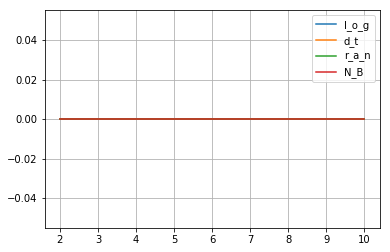

In [31]:
df_test.plot(grid = 1)
plt.show()
# plt.grid()

In [32]:
#building the model at k value 2 
test_scores={}
train_scores={}
for i in range(2,4,2):
    kf = KFold(n_splits = i)
    sum_train = 0
    sum_test = 0
    data = df
    for train,test in kf.split(data):
        train_data = data.iloc[train,:]
        test_data = data.iloc[test,:]
        x_train = train_data.drop(["prognosis"],axis=1)
        y_train = train_data['prognosis']
        x_test = test_data.drop(["prognosis"],axis=1)
        y_test = test_data["prognosis"]
        algo_model = dt.fit(x_train,y_train)
        sum_train += dt.score(x_train,y_train)
        y_pred = dt.predict(x_test)
        sum_test += accuracy_score(y_test,y_pred)
    average_test = sum_test/i
    average_train = sum_train/i
    test_scores[i] = average_test
    train_scores[i] = average_train
    print("kvalue: ",i)  

kvalue:  2


In [33]:
print(train_scores)
print(test_scores)

{2: 0.926056338028169}
{2: 0.0}


In [34]:
#a = list(range(2,134))
a = list(range(2,241))
i_name  = (input('Enter your name :'))
i_age = (int(input('Enter your age:')))
for i in range(len(x.columns)):
    print(str(i+1+1) + ":", x.columns[i])
choices = input('Enter the Serial no.s which is your Symptoms are exist:  ')
b = [int(x) for x in choices.split()]
count = 0
while count < len(b):
    item_to_replace =  b[count]
    replacement_value = 1
    indices_to_replace = [i for i,x in enumerate(a) if x==item_to_replace]
    count += 1
    for i in indices_to_replace:
        a[i] = replacement_value
a = [0 if x !=1 else x for x in a]
y_diagnosis = dt.predict([a])
y_pred_2 = dt.predict_proba([a])
print(('Name of the infection = %s , confidence score of : = %s') %(y_diagnosis[0],y_pred_2.max()* 100),'%' )
print(('Name = %s , Age : = %s') %(i_name,i_age))

Enter your name :ICMR
Enter your age:45
2: Chest Pain
3: Fatigue
4: fast heart rate
5: dizziness
6: shortness of breathing
7: murmur
8: irregular heart beating
9: cool skin
10: Weakness
11: sweating
12: fainting
13: fever
14: bluish skin
15: inability to exercise
16: kidney abnormalities
17: tiredness
18: hair loss on diff parts
19: vomiting
20: swelling 
21: cough / whoop cough / barking cough
22: chest pain / chest discomfort
23: fever.1
24: shortness of breath
25: fatigue
26: wheezing
27: fast heart rate.1
28: weight loss / loss of appetite
29: dry cough
30: coughing up blood
31: clubbing
32: throat irritation /sore throat
33: anxiety
34: early awakening
35: chills
36: hoarseness
37: stuffy nose /runny nose
38: heartburn
39: frequent respiratory infections
40: nasal congestion
41: Pain in Muscles
42: nausea
43: Swollen Lymph nodes
44: Malaise
45: noise in breathing
46: abdominal pain
47: nasal polyps
48: diarrhea
49: aching limbs and joint
50: vomitting
51: headache
52: weakness
53:

In [35]:
#seperated the independent and dependent values to repective variables 
x = df.drop(['prognosis'],axis =1)
y = df['prognosis']

In [36]:
#checking if there are any other data types
df.dtypes.unique()

array([dtype('int64'), dtype('O')], dtype=object)

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(encoding = "latin-1", strip_accents = "unicode")
features = vec.fit_transform(df["prognosis"])
print(features.shape)

(284, 482)


In [38]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
data=cv.fit_transform(df["prognosis"])
print (data.shape)

(284, 482)


In [39]:
cv = CountVectorizer()

data=cv.fit(df["prognosis"])
# x.vocabulary_
data.get_feature_names()
data= cv.fit_transform(df["prognosis"]).toarray()
data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [46]:
dfs = pd.DataFrame(data,columns=cv.get_feature_names())
dfs

,19,2a,2b,2c,2f,2g,2h,acanthosis,acheiropodia,achilles,...,wallenberg,wart,weak,whiplash,whipple,williams,work,wrist,yunis,zellweger
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(df, y, test_size = 0.20, random_state = 0)

# # Training model using Naive bayes classifier

# from sklearn.naive_bayes import MultinomialNB
# spam_detect_model = MultinomialNB().fit(x_train, y_train)

# # y_pred=spam_detect_model.predict(x_test)

In [42]:
# #saved the model 
# import pickle
# from sklearn.externals import joblib
# joblib.dump(dt,'my_model_for_healthcare')
# filename = 'webmd.pkl'
# pickle.dump(dt, open(filename, 'wb'))

In [45]:
# saving model
import pickle

pickle.dump(dt, open('webmd.pkl','wb'))
pickle.dump(data, open('predict','wb'))